<a href="https://colab.research.google.com/github/life-ofpi/2024_DL/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
!pip install torchvision

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import fetch_openml

mnist=fetch_openml("mnist_784")
mnist.data.shape, mnist.target.shape
x_data=mnist.data
y_data=mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.20,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56000, 784)
(14000, 784)
(56000,)
(14000,)


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=42)

# pandas의 DataFrame 또는 numpy 배열을 PyTorch 텐서로 변환
X_train_tensor = torch.tensor(X_train.values).float()  # 모델과 호환되도록 float 타입으로 변환
y_train_tensor = torch.tensor(y_train.values).long()   # 레이블/타깃이므로 long 타입으로 변환

X_test_tensor = torch.tensor(X_test.values).float()
y_test_tensor = torch.tensor(y_test.values).long()



In [ ]:
import torch.nn as nn

class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs
#입력 데이터를 받아 선형 변환을 수행한 후, 시그모이드 함수를 통해 확률을 출력하는 간단한 로지스틱 회귀 모델을 구현

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
#hyper parameters
epochs = 10000
input_dim = 784
output_dim = 10
lr = 0.01
model = LogisticRegression(input_dim, output_dim)
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss() #교차 entropy
optimizer = torch.optim.SGD(model.parameters(), lr=lr)


cuda


In [ ]:
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

train_loss_save_arr = []
test_loss_save_arr = []
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)

# 테스트 데이터셋을 위한 TensorDataset 인스턴스 생성
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


epoch  0
loss  2.428987741470337
train_accuracy 0.085
test_accuracy 0.117
epoch  1000
loss  1.563092589378357
train_accuracy 0.884
test_accuracy 0.879
epoch  2000
loss  1.5534495115280151
train_accuracy 0.892
test_accuracy 0.889
epoch  3000
loss  1.5491183996200562
train_accuracy 0.897
test_accuracy 0.891
epoch  4000
loss  1.545987606048584
train_accuracy 0.899
test_accuracy 0.894
epoch  5000
loss  1.5442380905151367
train_accuracy 0.900
test_accuracy 0.894
epoch  6000
loss  1.5427018404006958
train_accuracy 0.901
test_accuracy 0.894
epoch  7000
loss  1.5412440299987793
train_accuracy 0.902
test_accuracy 0.896
epoch  8000
loss  1.5412737131118774
train_accuracy 0.902
test_accuracy 0.897
epoch  9000
loss  1.5393997430801392
train_accuracy 0.903
test_accuracy 0.896


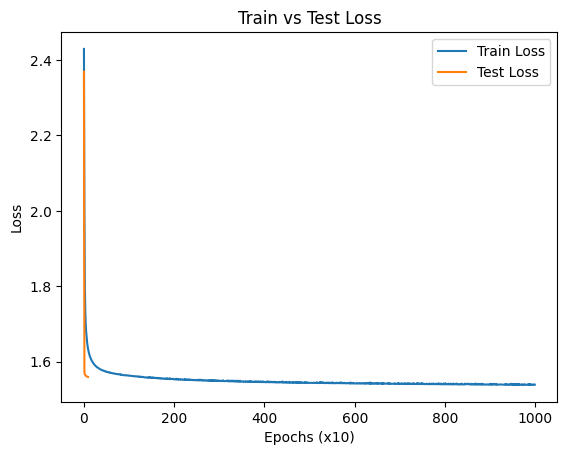

In [ ]:
loss_save_arr = []

for i in range(epochs):
    #### train ####
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    loss_save_arr.append(loss.item())

    if i % 10 == 0:
        # 10 에폭마다 훈련 손실 기록
        train_loss_save_arr.append(loss.item())


    if i % 1000 == 0:
        print("======")
        print('epoch ', i)
        print('loss ', loss.item())
        _, pred = torch.max(output.data, axis=1)
        train_accuracy = (pred == y_train_tensor).float().mean().item()
        print(f"train_accuracy {train_accuracy:.3f}")


    #### test ####
        model.eval()
        with torch.no_grad():
          test_loss = 0
          correct = 0
          total =0
          for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)  # 전체 손실에 더함
            _, pred = torch.max(output, 1)
            correct += (pred == target).sum().item()  # 정확히 예측된 샘플 수를 더함
            total += target.size(0)
          test_loss /= len(test_loader.dataset)
          test_accuracy = correct / total
          print(f"test_accuracy {test_accuracy:.3f}")
          test_loss_save_arr.append(test_loss)

plt.plot(train_loss_save_arr, label='Train Loss')
plt.plot(test_loss_save_arr, label='Test Loss')
plt.xlabel('Epochs (x10)')
plt.ylabel('Loss')
plt.title('Train / Test Loss')
plt.legend()
plt.show()


In [ ]:
#Accuracy를 올리기 위해서 무엇을 추가 할 수 있을지 한줄로 의견과 근거를 작성하고 실제로 코드에 반영 했을 때 결과가 어떤지 확인
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
#hyper parameters
epochs = 10000
input_dim = 784
output_dim = 10
lr = 0.01
model = LogisticRegression(input_dim, output_dim)
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss() #교차 entropy
# Optimizer 변경: SGD -> Adam, l2정규화 적용
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)



cuda


In [ ]:
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

train_loss_save_arr = []
test_loss_save_arr = []
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)

# 테스트 데이터셋을 위한 TensorDataset 인스턴스 생성
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
# 학습률 스케줄러 추가
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)


epoch  0
loss  2.388636827468872
train_accuracy 0.105
test_accuracy 0.118
epoch  1000
loss  1.5343329906463623
train_accuracy 0.910
test_accuracy 0.904
epoch  2000
loss  1.529736042022705
train_accuracy 0.913
test_accuracy 0.904
epoch  3000
loss  1.5275766849517822
train_accuracy 0.913
test_accuracy 0.903
epoch  4000
loss  1.5267192125320435
train_accuracy 0.913
test_accuracy 0.903
epoch  5000
loss  1.528224229812622
train_accuracy 0.909
test_accuracy 0.898
epoch  6000
loss  1.525604248046875
train_accuracy 0.914
test_accuracy 0.900
epoch  7000
loss  1.5245524644851685
train_accuracy 0.914
test_accuracy 0.901
epoch  8000
loss  1.525282621383667
train_accuracy 0.915
test_accuracy 0.899
epoch  9000
loss  1.5240391492843628
train_accuracy 0.914
test_accuracy 0.900


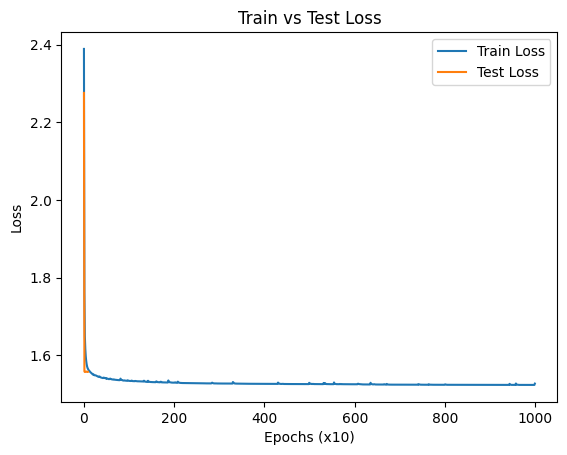

In [ ]:
loss_save_arr = []
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

for i in range(epochs):
    #### train ####
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    loss_save_arr.append(loss.item())
    scheduler.step()  # 에포크마다 학습률 스케줄러 업데이트

    if i % 10 == 0:
        train_loss_save_arr.append(loss.item())


    if i % 1000 == 0:
        print("======")
        print('epoch ', i)
        print('loss ', loss.item())
        _, pred = torch.max(output.data, axis=1)
        train_accuracy = (pred == y_train_tensor).float().mean().item()
        print(f"train_accuracy {train_accuracy:.3f}")


    #### test ####
        model.eval()
        with torch.no_grad():
          test_loss = 0
          correct = 0
          total =0
          for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)
            _, pred = torch.max(output, 1)
            correct += (pred == target).sum().item()
            total += target.size(0)
          test_loss /= len(test_loader.dataset)
          test_accuracy = correct / total
          print(f"test_accuracy {test_accuracy:.3f}")
          test_loss_save_arr.append(test_loss)

plt.plot(train_loss_save_arr, label='Train Loss')
plt.plot(test_loss_save_arr, label='Test Loss')
plt.xlabel('Epochs (x10)')
plt.ylabel('Loss')
plt.title('Train / Test Loss')
plt.legend()
plt.show()
